## Spadek wzdłuż gradientu

![gory_mgla](gory_mgla.png)

Załóżmy, że zabłądziliśmy w górach podczas gęstej mgły i wyczuwamy jedynie nachylenie terenu pod stopami. Logicznym zejściem na dno doliny jest podążanie w dół po jak największej pochyłości. Dokłądnie taki jest mechanizm działania gradientu prostego: algorytm mierzy lokalny gradient funkcji błędu w odniesieniu do wektora parametrów $ \boldsymbol{\beta} $, a następnie podąża w kierunku malejącego gradientu. Po uzyskaniu wartości 0 docieramy do minimum funkcji.

## Spadek wzdłuż gradientu

Spadek wzdłuż gradientu (gradient descent) to iteracyjna metoda optymalizacji, która jest używana do minimalizacji funkcji kosztu, w tym przypadku sumy kwadratów reszt. W kontekście regresji liniowej, algorytm ten polega na aktualizacji współczynników regresji w kierunku przeciwnym do gradientu funkcji kosztu. Procedura ta wygląda następująco:

1. Inicjalizuj wartości współczynników (np. losowo).
2. Oblicz gradient funkcji kosztu, który wskazuje kierunek największego wzrostu funkcji.
3. Zaktualizuj współczynniki, odejmując od nich wartość gradientu pomnożoną przez współczynnik uczenia (learning rate).
4. Powtarzaj kroki 2 i 3, aż do osiągnięcia zadowalającego poziomu konwergencji (np. gdy zmiany w współczynnikach są mniejsze niż zadany próg).

Spadek wzdłuż gradientu jest szczególnie przydatny w przypadku dużych zbiorów danych, gdzie obliczanie macierzy odwrotnej (jak w równaniu normalnym) może być niepraktyczne. Metoda ta pozwala na efektywne dopasowanie modelu, nawet w sytuacjach, gdy liczba zmiennych jest bardzo duża. 

Obie metody (równanie normalne, spadek wzdłóż gradientu) mają swoje zalety i ograniczenia, a wybór między nimi zależy od specyfiki problemu oraz dostępnych zasobów obliczeniowych.

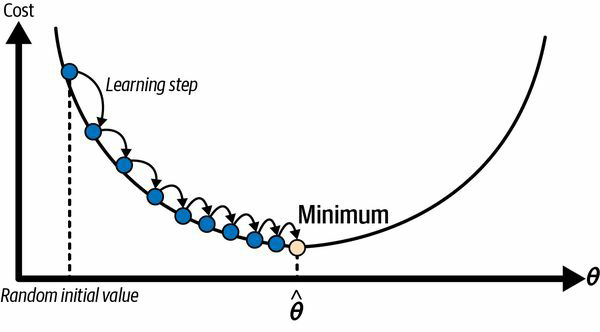

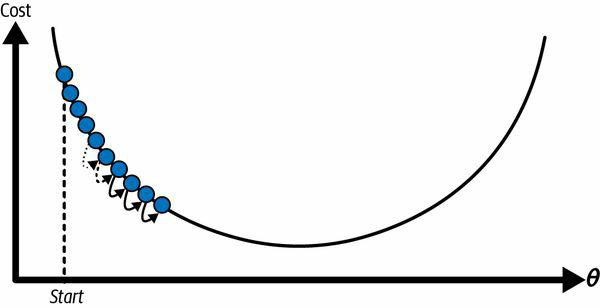

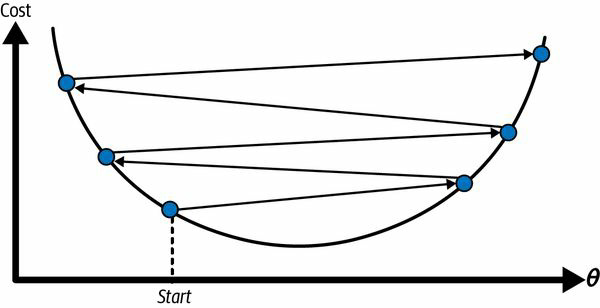

### Dla sieci neuronowych:

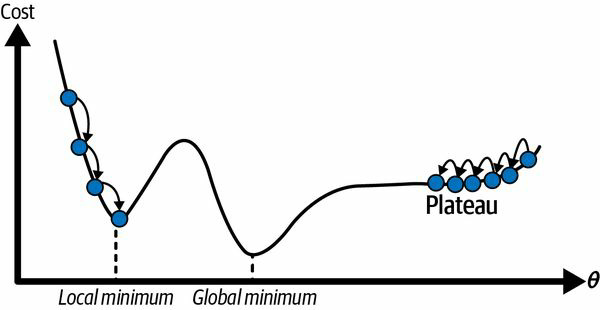

Na szczęście funkcja kosztu dla regresji liniowej jest wypukła. Nie istnieją lokalne minima. Tak więc, metoda gradientu prostego gwarantuje zbliżenie się do minimum globalnego.

## Przykład w kodzie:

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [4]:
X1 = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])
m = len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


In [7]:
X1.shape

(6,)

### przygotowanie danych

In [8]:
X1 = X1.reshape(m, 1)
Y = Y.reshape(-1, 1)
print(X1)
print(X1.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)


In [9]:
bias = np.ones((m, 1))
print(bias)
print(bias.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(6, 1)


In [10]:
X = np.append(bias, X1, axis=1)
print(X)
print(X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
(6, 2)


### Losowa inicjalizacja parametrów

In [18]:
eta = 0.01

weights = np.random.rand(2,1)

In [12]:
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.]])

In [19]:
weights

array([[0.28663294],
       [0.42547799]])

### Meto